Epoch 0: Cost = 0.6931471805599453
Epoch 100: Cost = 0.6112286807304671
Epoch 200: Cost = 0.5623650142741485
Epoch 300: Cost = 0.5319921210453049
Epoch 400: Cost = 0.5122852234654044
Epoch 500: Cost = 0.498987209081305
Epoch 600: Cost = 0.48969904839004635
Epoch 700: Cost = 0.4830140858478596
Epoch 800: Cost = 0.47807564472479075
Epoch 900: Cost = 0.4743436939153306
Epoch 1000: Cost = 0.4714671316424419
Epoch 1100: Cost = 0.46921128725935324
Epoch 1200: Cost = 0.46741535765787284
Epoch 1300: Cost = 0.4659666439189604
Epoch 1400: Cost = 0.4647845223115049
Epoch 1500: Cost = 0.4638102211153515
Epoch 1600: Cost = 0.4630001519907912
Epoch 1700: Cost = 0.46232146978139843
Epoch 1800: Cost = 0.4617490598365523
Epoch 1900: Cost = 0.46126345801088237
Epoch 2000: Cost = 0.46084939118587365
Epoch 2100: Cost = 0.46049473761263077
Epoch 2200: Cost = 0.460189775747857
Epoch 2300: Cost = 0.4599266342405586
Epoch 2400: Cost = 0.45969888409602117
Accuracy:  80.06932409012131


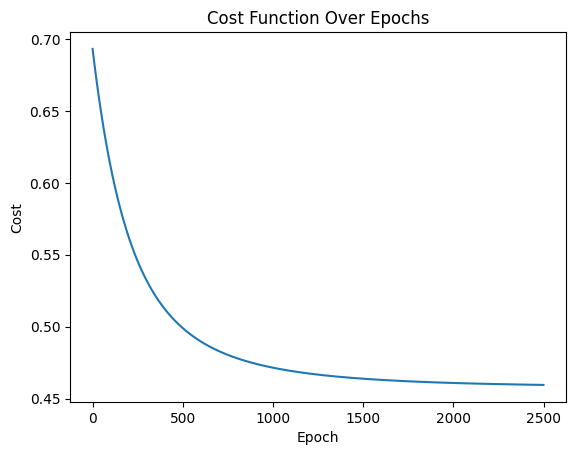

Epoch 0: Cost = 0.6931471805599453
Epoch 100: Cost = 0.6416091841503183
Epoch 200: Cost = 0.6100539583460902
Epoch 300: Cost = 0.5903927717168139
Epoch 400: Cost = 0.5778915108232412
Epoch 500: Cost = 0.5697860609007285
Epoch 600: Cost = 0.5644380994713308
Epoch 700: Cost = 0.5608557308121593
Epoch 800: Cost = 0.5584248838749128
Epoch 900: Cost = 0.5567572686967053
Epoch 1000: Cost = 0.5556026140267494
Epoch 1100: Cost = 0.5547968520715639
Epoch 1200: Cost = 0.5542308228893668
Epoch 1300: Cost = 0.5538309600196363
Epoch 1400: Cost = 0.5535471313035002
Epoch 1500: Cost = 0.553344845370442
Epoch 1600: Cost = 0.5532001752991684
Epoch 1700: Cost = 0.5530964044703702
Epoch 1800: Cost = 0.5530217821001171
Epoch 1900: Cost = 0.5529680044619454
Epoch 2000: Cost = 0.5529291770212675
Epoch 2100: Cost = 0.5529010990643786
Epoch 2200: Cost = 0.5528807668770788
Epoch 2300: Cost = 0.5528660264195674
Epoch 2400: Cost = 0.5528553291098169
Predictions of Pclass: False , Actual Value:0
Accuracy:  100.0


In [6]:
import random as rand
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:\\Users\\SOURI\\Desktop\\Manas_TaskPhase\\train_logistic.csv')
test_data = pd.read_csv('C:\\Users\\SOURI\\Desktop\\Manas_TaskPhase\\test_logistic.csv')
X = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]
X["Sex"].dtype
X["Sex"]=(X["Sex"].replace("female",1)).replace("male",0)
X_test = test_data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]
X1 = test_data[['Pclass']]
X2 = test_data[['Sex']]
X2["Sex"].dtype
X2["Sex"]=(X2["Sex"].replace("female",1)).replace("male",0)
X3 = test_data[['Age']]
X4 = test_data[['Siblings/Spouses Aboard']]
X5 = test_data[['Parents/Children Aboard']]
Y=data['Survived']
Y_test = test_data['Survived']
iX1 = 'Pclass'
iX2 = 'Sex'
iX3 = 'Age'
iX4 = 'Siblings/Spouses Aboard'
iX5 = 'Parents/Children Aboard'


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_function(y, y_pred):
    m = len(y)
    cost = (-1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost


def logistic_regression(X, Y, learning_rate, iterations):
    m, n = X.shape
    coefficients = np.zeros(n)
    cost_history = []

    for iteration in range(iterations):
        z = X @ coefficients
        predictions = sigmoid(z)
        gradient = (1 / m) * (X.T @ (predictions - Y))
        coefficients -= learning_rate * gradient
        cost = cost_function(Y, predictions)
        cost_history.append(cost)

        if iteration % 100 == 0:
            print(f"Epoch {iteration}: Cost = {cost}")

    return coefficients, cost_history


def predict(X, coefficients, threshold=0.5):
    return sigmoid(X @ coefficients) >= threshold


def accuracy(y_true, y_pred):
    return (np.mean(y_true == y_pred))*100


def PLOT(X, iX, Y, n):
    X = (X - X.mean()) / X.std()
    X.insert(0, "intercept", np.ones(len(X)))

    X = X.values
    Y = Y.values

    learning_rate = 0.01
    iterations = 2500

    coefficients, cost_history = logistic_regression(X, Y, learning_rate, iterations)

    predictions = predict(X, coefficients)

    if n > 1:
        print("Accuracy: ", accuracy(Y, predictions))
        plt.plot(range(iterations), cost_history)
        plt.title("Cost Function Over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Cost")
        plt.show()

    if n == 1:
        num = rand.randrange(310)
        sample_data = X[num]
        actual_pred = Y[num]
        pred=predict(sample_data, coefficients)
        print(f"Predictions of {iX}: {pred} , Actual Value:{actual_pred}")
        print("Accuracy: ", accuracy([actual_pred], [pred]))
        


PLOT(X, ' ', Y, len(X.columns))
PLOT(X1, iX1, Y_test, len(X1.columns))
PLOT(X2, iX2, Y_test, len(X2.columns))
PLOT(X3, iX3, Y_test, len(X3.columns))
PLOT(X4, iX4, Y_test, len(X4.columns))
PLOT(X5, iX5, Y_test, len(X5.columns))
